# FINAL PROJECT 2: LOGISTIC REGRESSION DAN SVM

Project ini disusun guna memenuhi tugas pada Program Studi Independen Hacktiv8 Python for Data Science

#### Nama Anggota Kelompok :
1. Haikal Efendi - PYTN-KS08-001
2. Ni Made Kirei Kharisma Handayani - PYTN-KS08-002
3. Rosita Nurul Janatin - PYTN-KS08-005


### a. Introduction

#### Project Overview
Project ini berisi mengenai proses klasifikasi dalam memprediksi terjadinya hujan di Australia mengggunakan model klasifikasi Logistic Regression dan Support Vector Machine (SVM). Dataset yang digunakan dalam project ini merupakan dataset public yang terdapat pada laman kaggle. Secara umum, dataset ini memiliki 23 atribut yang dapat memberikan informasi mengenai data hujan harian selama 10 tahun di Australia, melalui informasi tersebut nantinya akan dilakukan pemodelan untuk memprediksi hujan esok hari

Berikut adalah informasi mengenai atribut dari dataset weatherAUS.csv :
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

Secara objektif, tujuan dari dibuatnya Final Projek ini adalah untuk mengevaluasi kemampuan mengenai : 
- Kemampuan untuk mengetahui konsep Classification dengan Logistic Regression dan SVM
- Kemampuan untuk mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Kemampuan untuk mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

### b. Import Library

In [42]:
# Data Processing
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler 
import pickle 
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn import svm 
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from collections import Counter

### c. Data Loading

In [43]:
# mengimport data
df = pd.read_csv('weatherAUS.csv')

In [44]:
# menampilkan 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [45]:
# menampilkan 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [46]:
# mengetahui dimensi dataset
df.shape

(145460, 23)

Dapat diketahui bahwa dataset tersebut terdiri dari 145460 baris dan 23 kolom

In [47]:
# informasi tipe data dari column dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [48]:
# Melihat banyaknya unique value dari setiap kolom/atribut
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

Dapat diketahui bahwa setiap atribut dari dataset tersebut memiliki unique value lebih dari satu

### d. Data Cleaning

##### Cek missing value

In [49]:
# cek missing values dengan isnull().sum()
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [50]:
# Mengcek missing value beserta persentasenya terhadap total data
pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


Hasil di atas menunjukkan bahwa pada dataset tersebut masih banyak terdapat missing value. Oleh karena itu, perlu dilakukan penghapusan atau pengisian terdahap missing value pada kolom tersebut

Nb : 
- Kolom RainTomorrow merupakan atribut target sehingga missing value pada kolom tersebut dapat di drop secara langsung agar tidak menimbulkan bias pada hasil prediksi 
- Atribut yang memiliki persentase missing value di atas 25% dihapus agar hasil prediksi lebih sesuai
- Untuk kolom lainnya pada missing value dapat dilakukan dengan pengisian value menggunakan nilai mean/median

##### Handling missing value

In [51]:
# Menghapus missing value pada kolom RainTomorrow
df.dropna(subset=['RainTomorrow'], inplace=True)

In [52]:
# Mengcek missing value beserta persentasenya terhadap total data
pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,637,0.45 %
MaxTemp,322,0.23 %
Rainfall,1406,0.99 %
Evaporation,60843,42.79 %
Sunshine,67816,47.69 %
WindGustDir,9330,6.56 %
WindGustSpeed,9270,6.52 %
WindDir9am,10013,7.04 %


In [53]:
# Menghapus atribut yang memiliki nilai miissing value di atas 25%
df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [54]:
# Mengcek missing value beserta persentasenya terhadap total data
pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,637,0.45 %
MaxTemp,322,0.23 %
Rainfall,1406,0.99 %
WindGustDir,9330,6.56 %
WindGustSpeed,9270,6.52 %
WindDir9am,10013,7.04 %
WindDir3pm,3778,2.66 %
WindSpeed9am,1348,0.95 %


In [55]:
# membuat list untuk kolom bertipe numerik
num_col = ['MinTemp', 'MaxTemp', 'Rainfall',  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
# membuat list untuk kolom bertipe categorial
cate_col = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# mengisi missing value dengan nilai rata-rata
for col in num_col :
    df[col] = df[col].fillna(df[col].mean())
# mengisi missing value dengan nilai modus
for col in cate_col :
    df[col] = df[col].fillna(df[col].mode()[0])


# mengecek kembali missing values
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Saat ini kondisi dataset sudah terbebas dari missing value

### e. Explorasi Data

Melihat persebaran data "RainToday" dan "RainTomorrow"

In [56]:
df_rain = df[['RainToday', 'RainTomorrow']].value_counts()
df_rain

RainToday  RainTomorrow
No         No              93458
           Yes             17280
Yes        No              16858
           Yes             14597
dtype: int64

Text(0.5, 0, 'Kondisi Terjadinya Hujan')

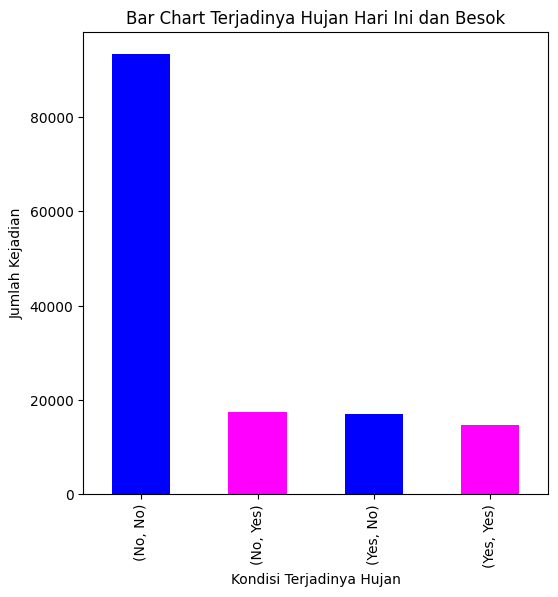

In [57]:
df_rain.plot(kind='bar', figsize=(6,6), color=["blue", "magenta"])

plt.title('Bar Chart Terjadinya Hujan Hari Ini dan Besok')
plt.ylabel('Jumlah Kejadian')
plt.xlabel('Kondisi Terjadinya Hujan')

Berdasarkan plot di atas terlihat bahwa dalam kurun waktu 10 tahun di Australia kondisi hujan cenderung tidak terjadi di hari esok jika di hari ini tidak hujan

In [58]:
df_location = df['Location'].value_counts()
#df_location = df_location.head(10)
df_location

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


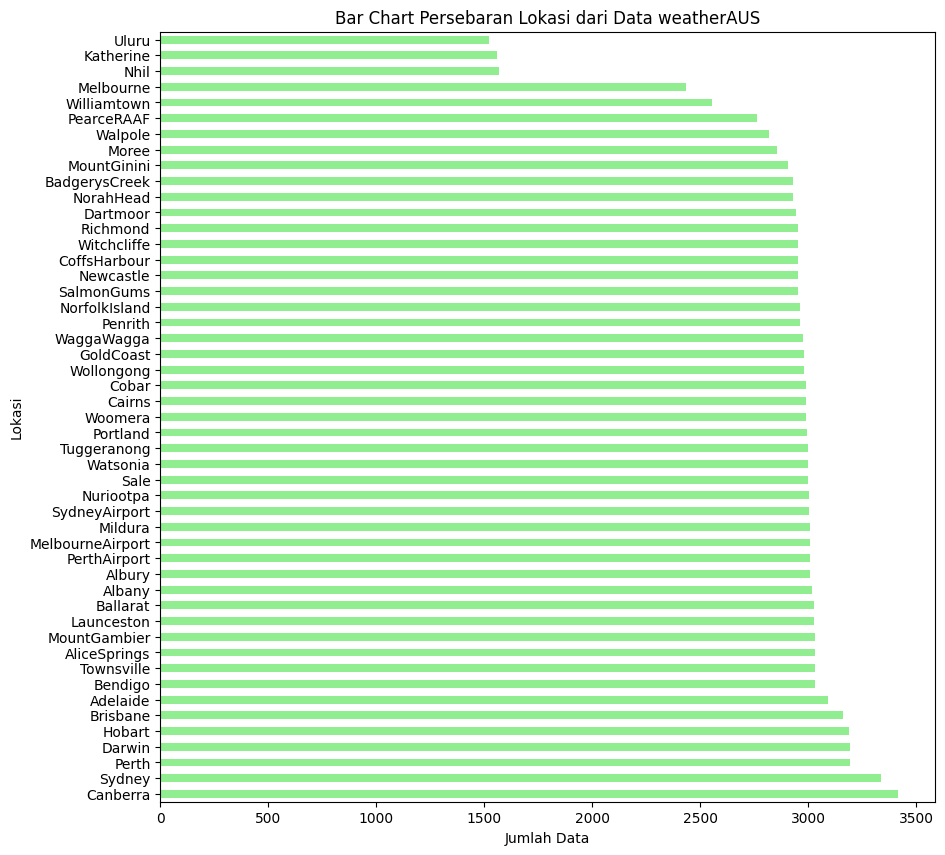

In [59]:
df_location.plot(kind='barh', figsize=(10,10), color='lightgreen')

plt.title('Bar Chart Persebaran Lokasi dari Data weatherAUS')
plt.xlabel('Jumlah Data')
plt.ylabel('Lokasi')
plt.show()

Berdasarkan plot di atas terlihat bahwa lokasi yang paling banyak terdapat di dataset adalah Canberra dan lokasi yang paling sedikit adalah Uluru

##### Membuat beberapa atribut dari atribut Date 

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

##### Delete column Date

In [61]:
# Menghapus kolom "Date"
df = df.drop(columns="Date")
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


In [62]:
df_months = df['Month'].value_counts()
df_months

5     13055
3     13036
1     12921
6     12389
10    11804
7     11779
8     11762
11    11461
9     11345
4     11306
12    10810
2     10525
Name: Month, dtype: int64

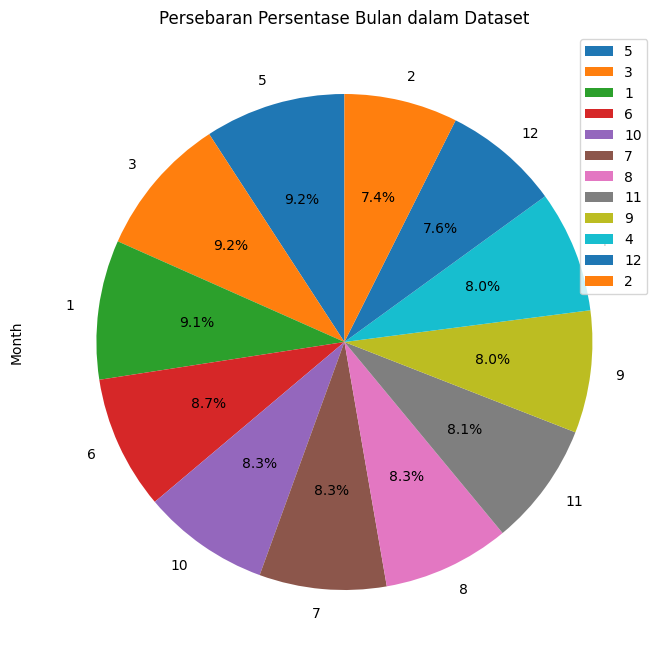

In [63]:
# visualisasi month dalam bentuk pie chart
df_months.plot(kind='pie',
                figsize=(8,10),
                autopct='%1.1f%%',  #add in percentages
                startangle=90,      #start angle 90 derajat
        )
plt.title('Persebaran Persentase Bulan dalam Dataset')
plt.legend(labels=df_months.index, loc='upper right')
plt.show()

Berdasarkan pie chart di atas dapat dilihat bahwa persebaran data prediksi yang terjadi di setiap bulannya tidak terlalu beda jauh antara satu sama lain

In [64]:
# Mendapatkan perhitungan statistika dari dataframe
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,15.715084,6.402544,2012.758926
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,31.000000,12.000000,2017.000000


Atribut Rainfall memiliki nilai std > mean , artinya nilai dari data Rainfall bervariasi/beragam sehingga cenderung memiliki outlier. Dengan demikian, atribut Rainfall dapat dihapus dari dataframe

In [65]:
# Menghapus kolom/atribut "Rainfall" dari dataset
df = df.drop(columns="Rainfall")

Selain itu, untuk melihat atribut yang memiliki nilai outliers suatu atribut juga dapat menggunakan data visualisasi

##### Melihat outliers melalui data visualisasi

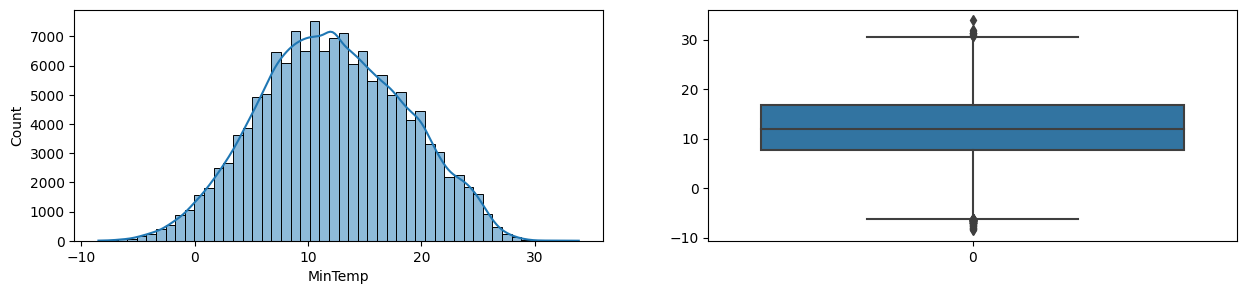

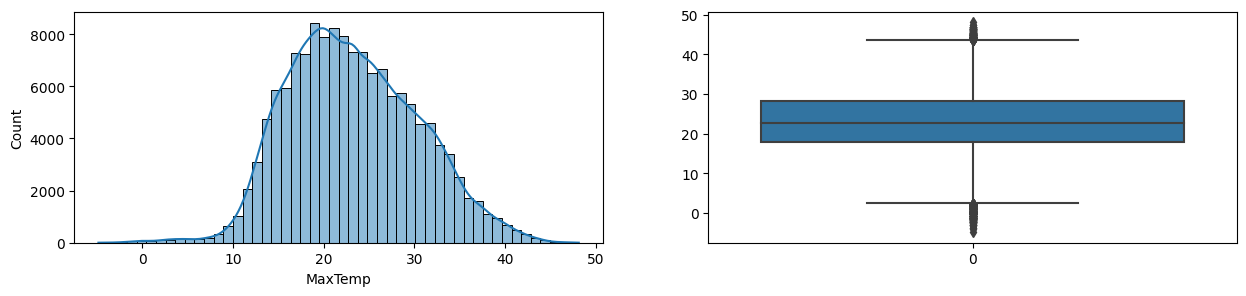

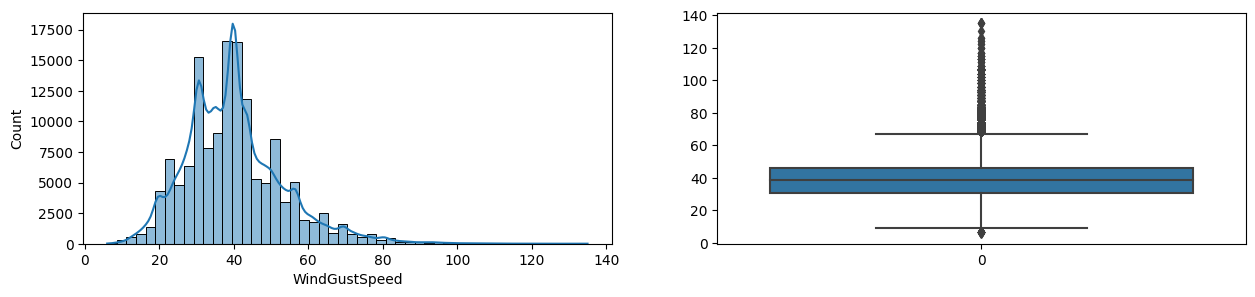

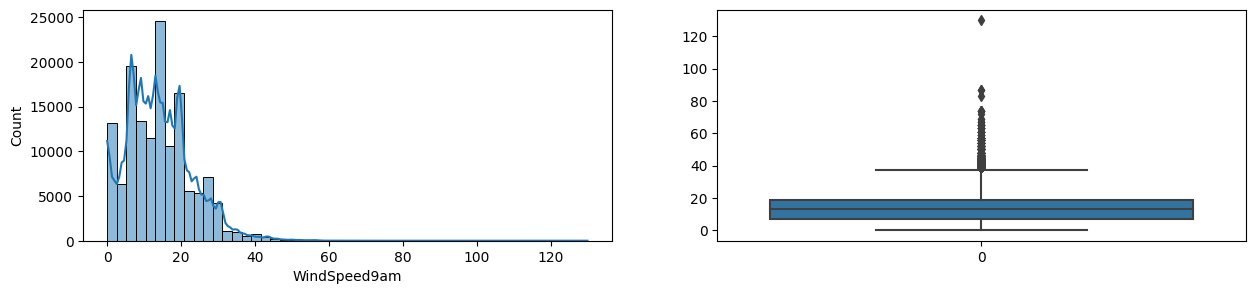

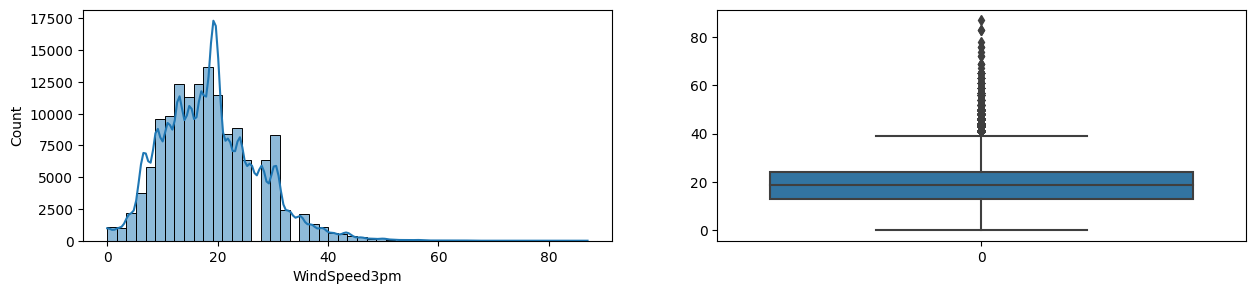

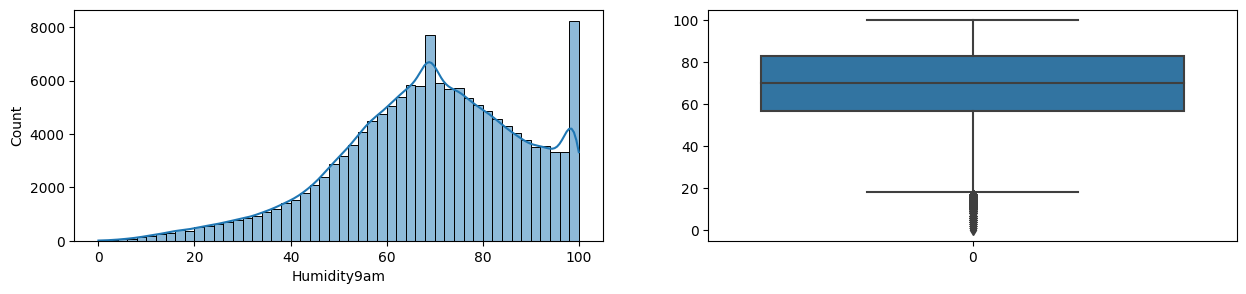

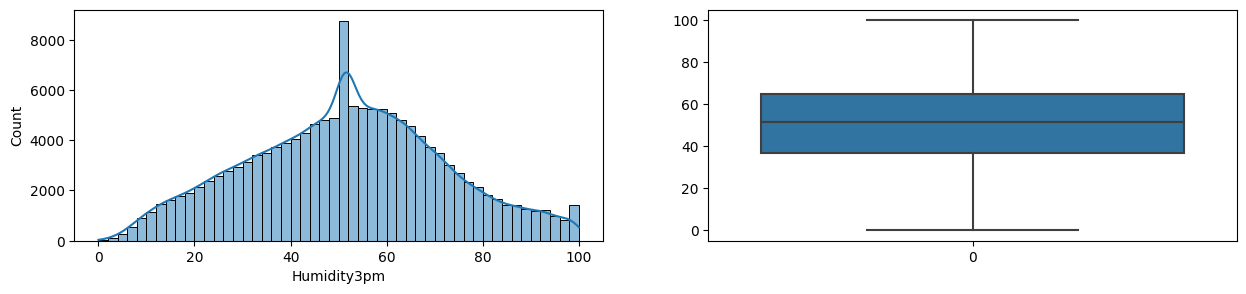

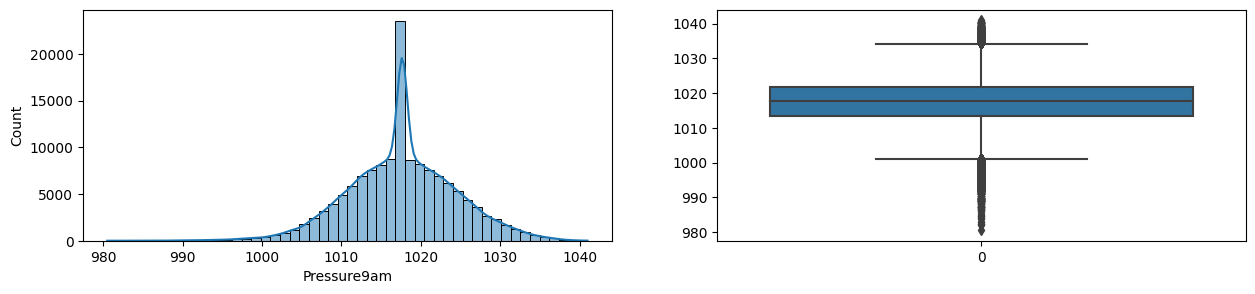

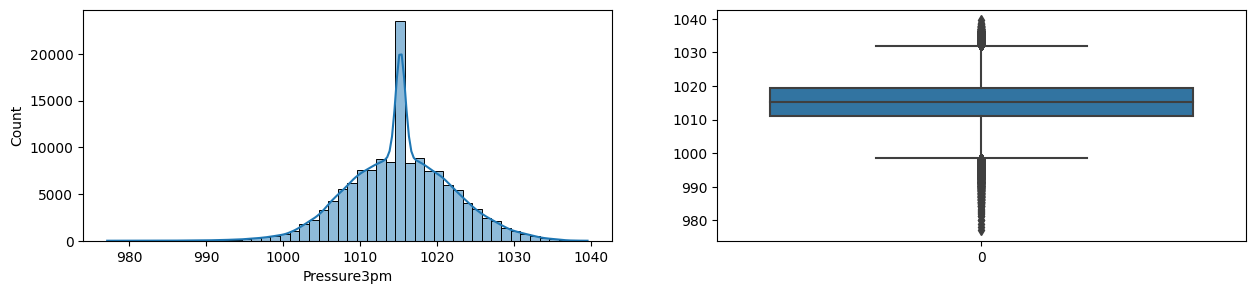

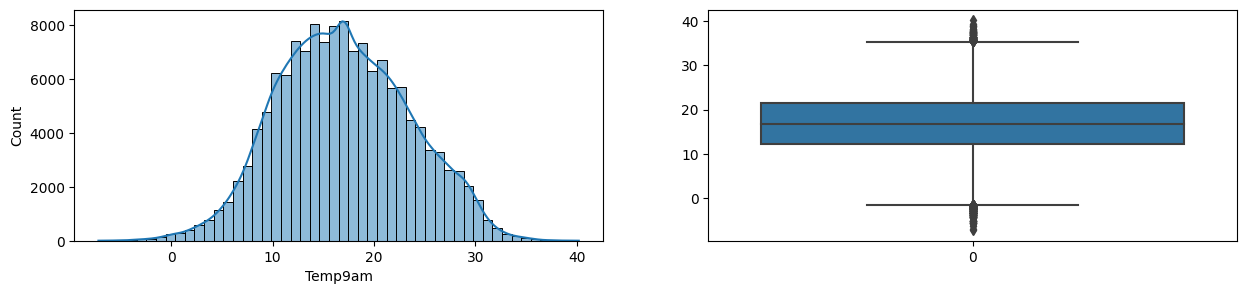

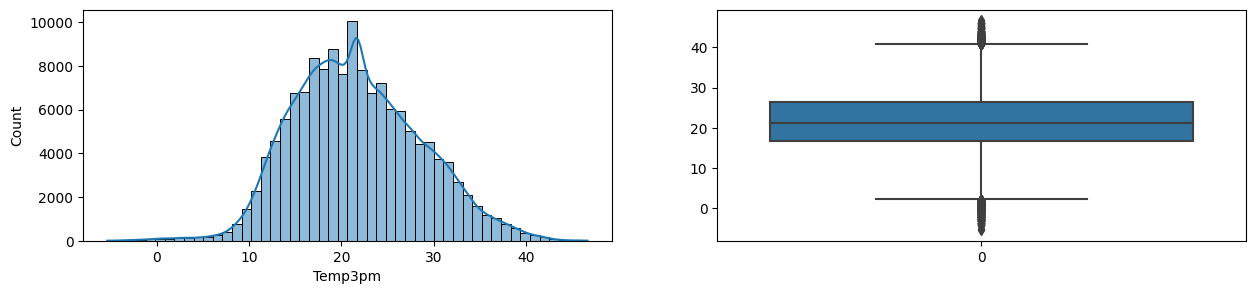

In [66]:
num_col = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df[x], ax=ax[1])

Berdasarkan plot di atas terlihat bahwa beberapa atribut seperti 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', dan 'Pressure3pm' memiliki outliers yang sangat signifikan terhadap persebaran data. Oleh karena itu, maka perlu dilakukan pembersihan/penghapusan terhadap outliers

##### Remove outlier

In [67]:
# Membuat fungsi untuk menghilangkan nilai-nilai outlier
def RemoveOutliers(num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*3)
        upper_threshold = df[col].quantile(0.75)+(iqr*3)
        print(f"Range value of outliers in {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
        
RemoveOutliers(num_col)

Range value of outliers in MinTemp : <-20.0 atau >44.4
Range value of outliers in MaxTemp : <-13.0 atau >59.1
Range value of outliers in WindGustSpeed : <-14.0 atau >91.0
Range value of outliers in WindSpeed9am : <-29.0 atau >55.0
Range value of outliers in WindSpeed3pm : <-20.0 atau >57.0
Range value of outliers in Humidity9am : <-21.0 atau >161.0
Range value of outliers in Humidity3pm : <-47.0 atau >149.0
Range value of outliers in Pressure9am : <988.6 atau >1046.7
Range value of outliers in Pressure3pm : <985.8 atau >1044.6
Range value of outliers in Temp9am : <-15.3 atau >49.1
Range value of outliers in Temp3pm : <-12.1 atau >55.1


##### Mengecek kembali outliers mealui visualisasi

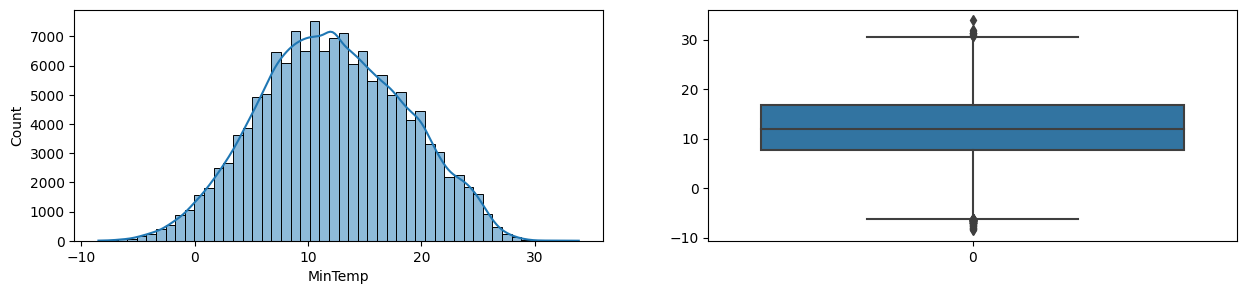

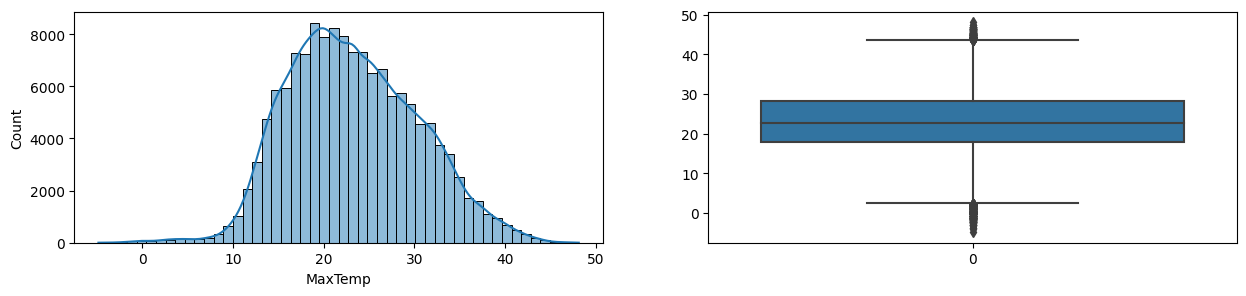

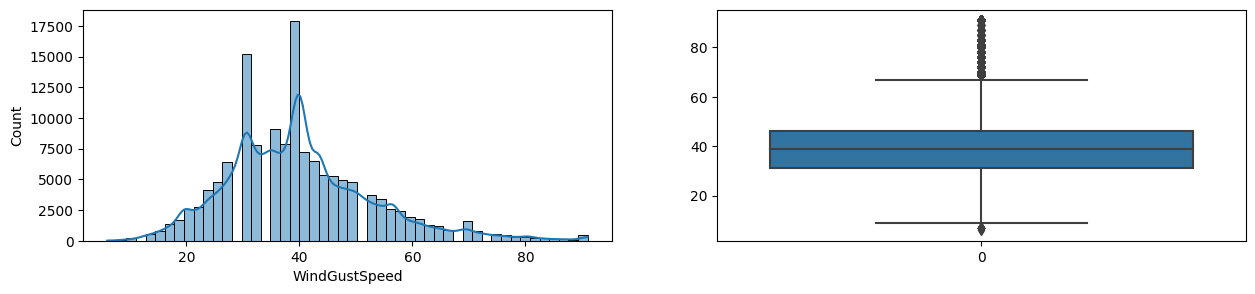

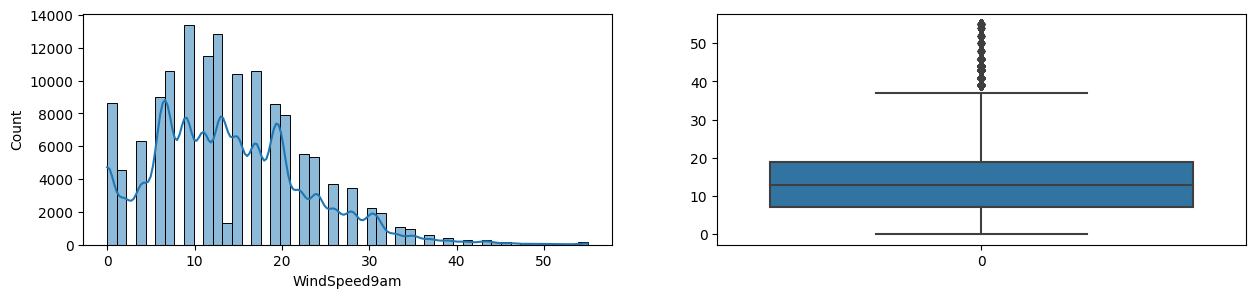

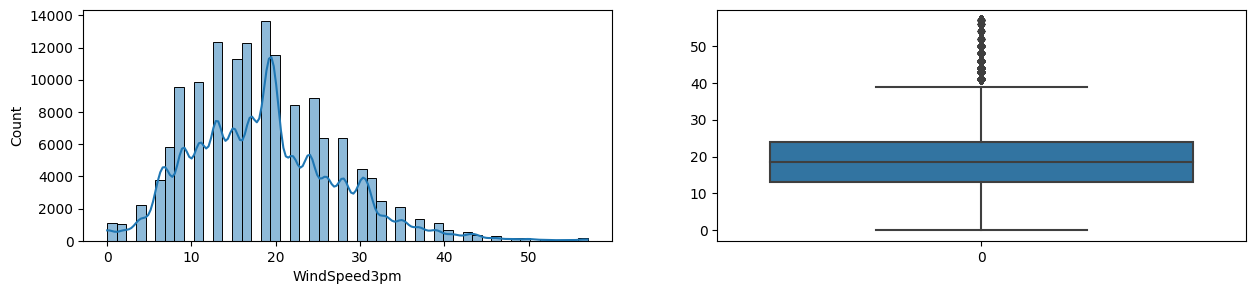

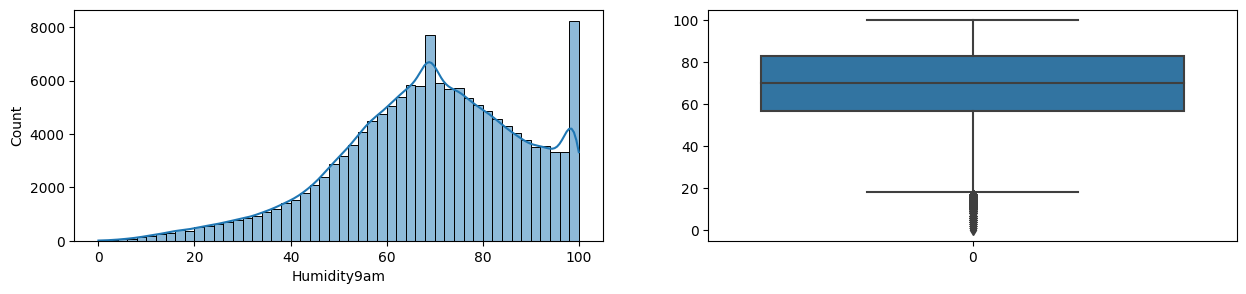

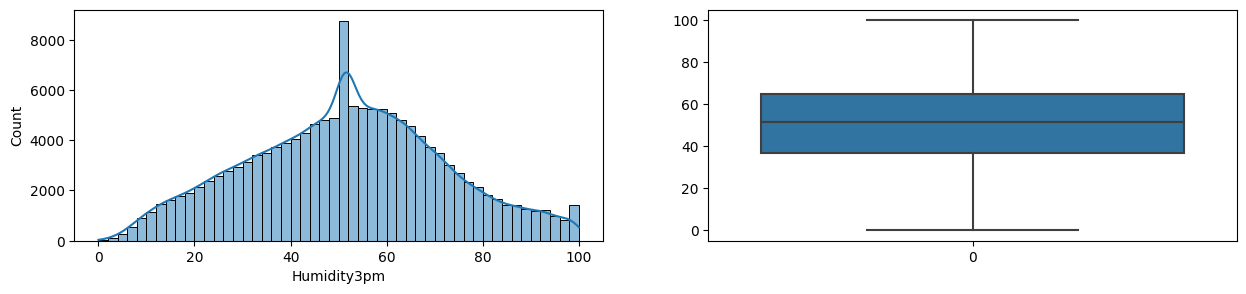

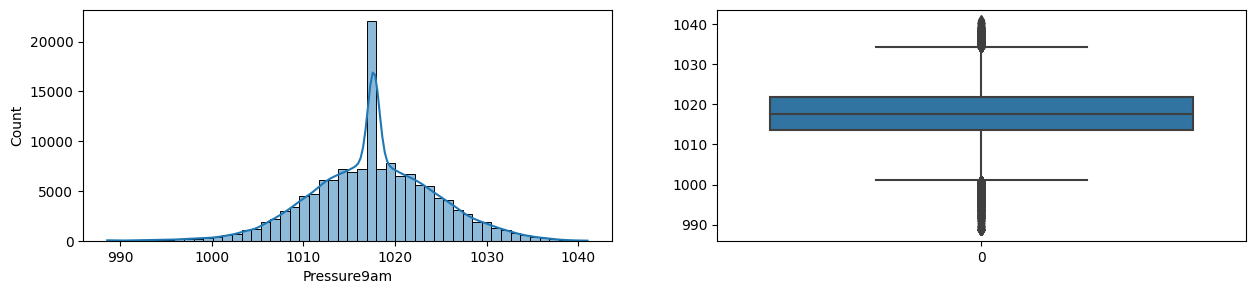

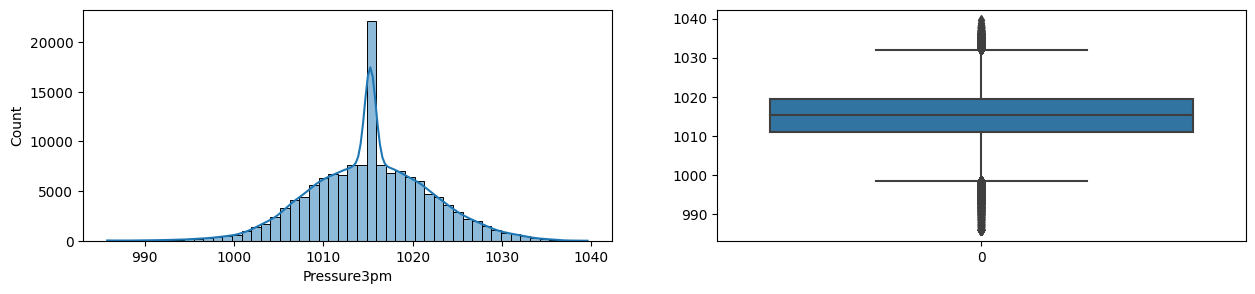

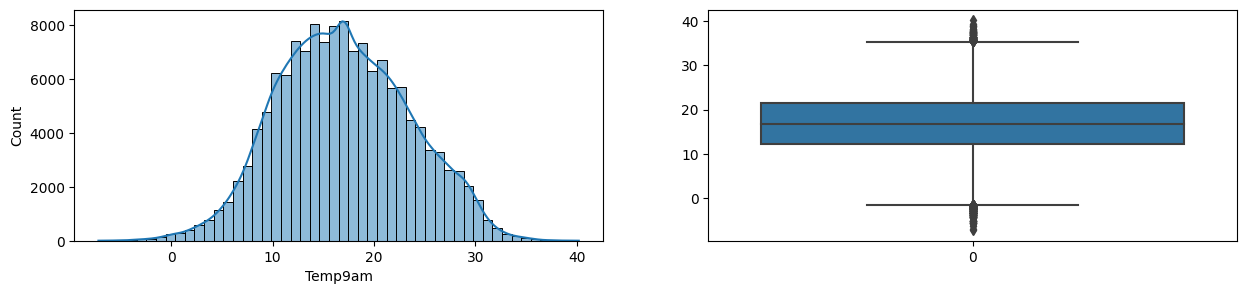

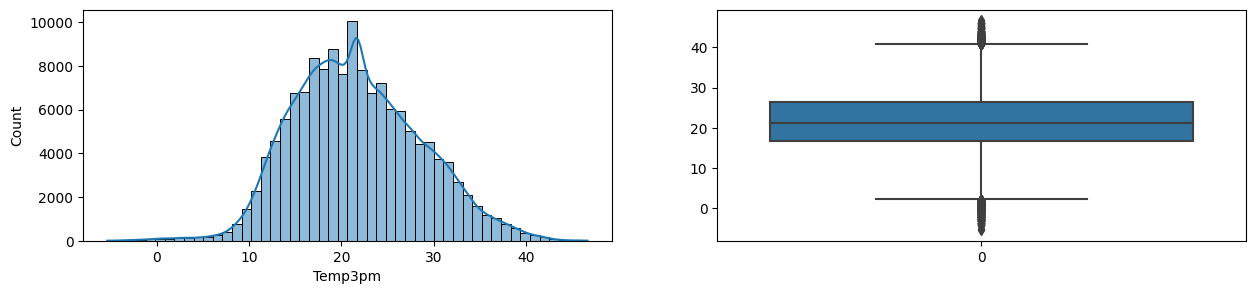

In [68]:
for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df[x], ax=ax[1])

Dari hasil pembersihan/penghapusan outlies di atas dapat dilihat bahwa nilai outliers saat ini sudah lebih baik, sebagai contoh pada atribut 'Pressure9am' dan 'Pressure3pm' yang sebelumnya memiliki outliers senilai lebih dari 20.000 sekarang menjadi bernilai kurang dari 20.000

### f. Data Preprocessing

#### Encoding

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   WindGustDir    142193 non-null  object 
 4   WindGustSpeed  142193 non-null  float64
 5   WindDir9am     142193 non-null  object 
 6   WindDir3pm     142193 non-null  object 
 7   WindSpeed9am   142193 non-null  float64
 8   WindSpeed3pm   142193 non-null  float64
 9   Humidity9am    142193 non-null  float64
 10  Humidity3pm    142193 non-null  float64
 11  Pressure9am    142193 non-null  float64
 12  Pressure3pm    142193 non-null  float64
 13  Temp9am        142193 non-null  float64
 14  Temp3pm        142193 non-null  float64
 15  RainToday      142193 non-null  object 
 16  RainTomorrow   142193 non-null  object 
 17  Day            142193 non-nul

In [70]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns:=['Location',  
                                                    'WindDir9am', 
                                                    'WindDir3pm', 
                                                    'RainToday', 
                                                    'RainTomorrow', 
                                                    ]

))
])

#Membuat variabel df_ep untuk menampung hasil encode
df_ep = encoding_pipeline.fit_transform(df)

In [71]:
df_ep.head()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2,13.4,22.9,W,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,2,7.4,25.1,WNW,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,2,12.9,25.7,WSW,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,2,9.2,28.0,NE,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,2,17.5,32.3,W,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008


In [72]:
df_ep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int32  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   WindGustDir    142193 non-null  object 
 4   WindGustSpeed  142193 non-null  float64
 5   WindDir9am     142193 non-null  int32  
 6   WindDir3pm     142193 non-null  int32  
 7   WindSpeed9am   142193 non-null  float64
 8   WindSpeed3pm   142193 non-null  float64
 9   Humidity9am    142193 non-null  float64
 10  Humidity3pm    142193 non-null  float64
 11  Pressure9am    142193 non-null  float64
 12  Pressure3pm    142193 non-null  float64
 13  Temp9am        142193 non-null  float64
 14  Temp3pm        142193 non-null  float64
 15  RainToday      142193 non-null  int32  
 16  RainTomorrow   142193 non-null  int32  
 17  Day            142193 non-nul

##### Data Correlation

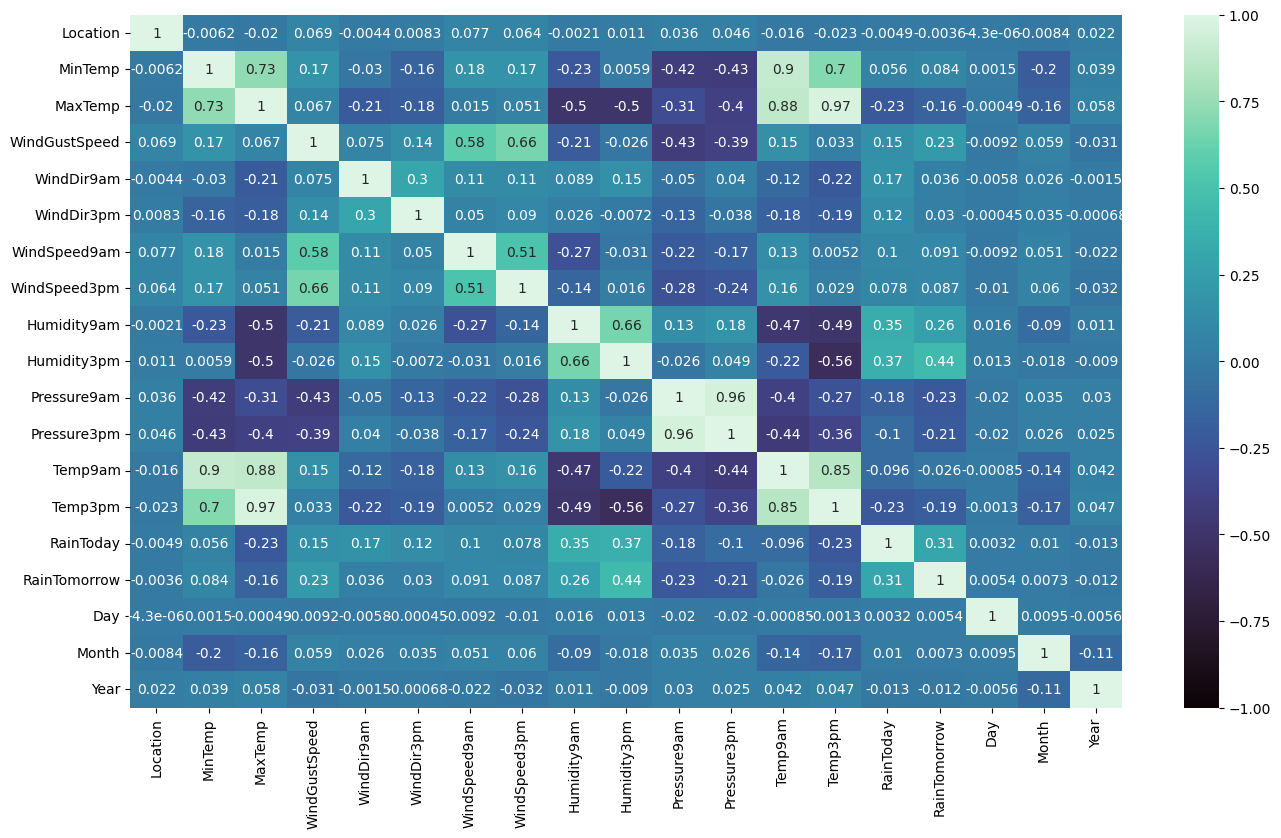

In [73]:
# Melihat korelasi keseluruhan atribut data
plt.figure(figsize=(16,9))
sns.heatmap(df_ep.corr(),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

Berdasarkan tabel korelasi di atas, dapat dilihat korelasi dari tiap atribut dalam dataset weatherAUS. Selanjutnya kita dapat berfokus melihat korelasi atribut terhadap data target yaitu RainTomorrow dengan perintah di bawah ini

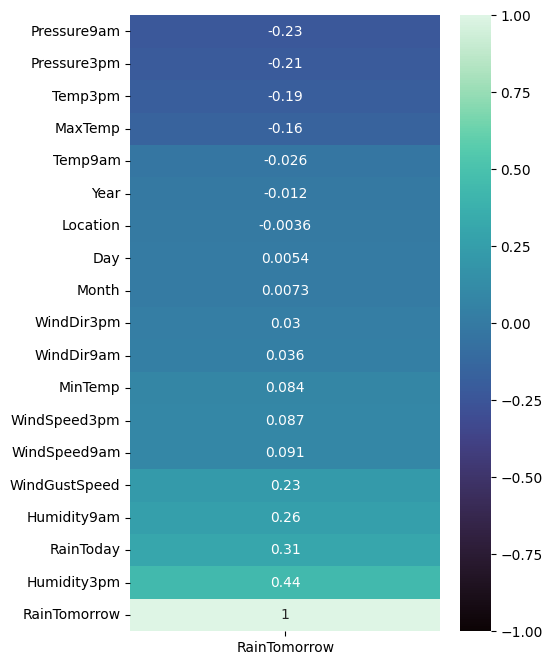

In [74]:
# Melihat korelasi seluruh atribut data terhadap RainTomorrow
plt.figure(figsize=(5, 8))
sns.heatmap(df_ep.corr()[['RainTomorrow']].sort_values(by='RainTomorrow'),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

Berdasarkan tabel korelasi di atas, dapat dilihat bahwa atribut Temp9am, Year, Location, Day, Month, WindDir3pm, WindDir9am, WindGustDir, WindSpeed3pm, MinTemp, WindSpeed9am memiliki korelasi yang rendah(mendekati 0) terhadap RainTomorrow sehingga atribut-atribut tersebut dapat dihilangkan	

##### Drop Columns

In [75]:
# Menghapus beberapa kolom yang memiliki tingkat korelasi rendah
# df[{bertipe numeric}] + df[{hasil encoding}]
df_predict = df.drop(columns=["Temp9am", "Location", "WindDir9am", "WindDir3pm", "Day", "Month", "Year", "WindGustDir", "WindSpeed3pm", "MinTemp", "WindSpeed9am"])
df_predict

,MaxTemp,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,44.0,71.0,22.0,1007.7,1007.1,21.8,No,No
1,25.1,44.0,44.0,25.0,1010.6,1007.8,24.3,No,No
2,25.7,46.0,38.0,30.0,1007.6,1008.7,23.2,No,No
3,28.0,24.0,45.0,16.0,1017.6,1012.8,26.5,No,No
4,32.3,41.0,82.0,33.0,1010.8,1006.0,29.7,No,No
...,...,...,...,...,...,...,...,...,...
145454,21.8,31.0,59.0,27.0,1024.7,1021.2,20.9,No,No
145455,23.4,31.0,51.0,24.0,1024.6,1020.3,22.4,No,No
145456,25.3,22.0,56.0,21.0,1023.5,1019.1,24.5,No,No
145457,26.9,37.0,53.0,24.0,1021.0,1016.8,26.1,No,No


In [76]:
# Mengubah value 'Yes' dan 'No' menjadi 1 dan 0
value = {'Yes' : 1, 'No' : 0}

df_predict.RainToday = [value[item] for item in df_predict.RainToday]

df_predict.RainTomorrow = [value[item] for item in df_predict.RainTomorrow]

df_predict.head()

,MaxTemp,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,RainTomorrow
0,22.9,44.0,71.0,22.0,1007.7,1007.1,21.8,0,0
1,25.1,44.0,44.0,25.0,1010.6,1007.8,24.3,0,0
2,25.7,46.0,38.0,30.0,1007.6,1008.7,23.2,0,0
3,28.0,24.0,45.0,16.0,1017.6,1012.8,26.5,0,0
4,32.3,41.0,82.0,33.0,1010.8,1006.0,29.7,0,0


### g. Pendefinisian Model

Project ini akan menggunakan 2 model classification dalam supervised machine learning yaitu Logistic Regression dan Support Vector Machine (SVM).

Selanjutnya feature yang digunakan dalam pemodelan ini akan mengambil beberapa atribut dari dataset weatherAUS seperti : 
- MaxTemp	
- WindGustSpeed	
- Humidity9am	
- Humidity3pm	
- Pressure9am	
- Pressure3pm	
- Temp3pm	
- RainToday	
- RainTomorrow (data target)

##### Train Split Data

In [77]:
# Membuat variabel y sebagai target
y = df_predict['RainTomorrow']

# Membuat variabel x sebagai prediktor
X = df_predict.drop(['RainTomorrow'], axis=1)

In [78]:
# Splitting data untuk training, testing, dan validasi
X_new, X_val, y_new, y_val = train_test_split(X, y, test_size=0.1, random_state=0)

- #### Logistic Regression

In [79]:
# Pipeline untuk standarisasi data, combine sampling, dan membuat model Logistic Regression
# data X_new dan y_new akan displit menjadi 4
cv = StratifiedKFold(n_splits=4)
model_logreg = make_pipeline(
                    RobustScaler(), 
                    SMOTEENN(),
                    LogisticRegression()
                ) 
cv_result_logreg = cross_validate(estimator=model_logreg, X=X_new, y=y_new, 
                            cv=cv, n_jobs=-1, verbose=2, scoring='balanced_accuracy', 
                            return_train_score=True, return_estimator=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.4s finished


- #### SVM

In [80]:
# Pipeline untuk standarisasi data dan membuat model
# data X_new dan y_new akan displit menjadi 4
cv = StratifiedKFold(n_splits=4)
model_svm = make_pipeline(
                    RobustScaler(), 
                    SMOTEENN(),
                    svm.SVC()
                ) 
cv_result_svm = cross_validate(estimator=model_svm, X=X_new, y=y_new, 
                            cv=cv, n_jobs=-1, verbose=2, scoring='balanced_accuracy', 
                            return_train_score=True, return_estimator=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed: 19.0min finished


### Evaluasi Model

- #### Logistic Regression

In [81]:
# Mencari skor akurasi model Logistic Regression
print(
    f"Balanced accuracy train mean +/- std. dev.: "
    f"{cv_result_logreg['train_score'].mean():.3f} +/- "
    f"{cv_result_logreg['train_score'].std():.3f}"
)
print(
    f"Balanced accuracy test mean +/- std. dev.: "
    f"{cv_result_logreg['test_score'].mean():.3f} +/- "
    f"{cv_result_logreg['test_score'].std():.3f}"
)

Balanced accuracy train mean +/- std. dev.: 0.759 +/- 0.001
Balanced accuracy test mean +/- std. dev.: 0.759 +/- 0.002


Berdasarkan evaluasi model di atas diperoleh hasil akurasi model :
- Untuk data train adalah 0.759 dengan standar deviasi sebesar 0.001
- Untuk data test adalah 0.759 dengan standar deviasi sebesar 0.002

- #### SVM

In [82]:
# Mencari skor akurasi model SVM
print(
    f"Balanced accuracy train mean +/- std. dev.: "
    f"{cv_result_svm['train_score'].mean():.3f} +/- "
    f"{cv_result_svm['train_score'].std():.3f}"
)
print(
    f"Balanced accuracy mean +/- std. dev.: "
    f"{cv_result_svm['test_score'].mean():.3f} +/- "
    f"{cv_result_svm['test_score'].std():.3f}"
)

Balanced accuracy train mean +/- std. dev.: 0.777 +/- 0.001
Balanced accuracy mean +/- std. dev.: 0.775 +/- 0.002


Berdasarkan evaluasi model di atas diperoleh hasil akurasi model :
- Untuk data train adalah 0.777 dengan standar deviasi sebesar 0.001
- Untuk data test adalah 0.774 dengan standar deviasi sebesar 0.002

### Improvement Model

- #### Logistic Regression

#### Menentukan performa model terbaik

In [83]:
a = cv_result_logreg['estimator'][0]
param = {
            'logisticregression__C' : [1,5,10],
            'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
clf_logreg = BayesSearchCV(model_logreg, param, n_jobs=-1, pre_dispatch='2*n_jobs', cv=cv, verbose=3, scoring='balanced_accuracy')
clf_logreg.fit(X_new, y_new)
clf_logreg_model = clf_logreg.best_estimator_

Fitting 4 folds for each of 1 candidates, totalling 4 fits


Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "c:\Users\Kirei\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\Kirei\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\process_executor.py", line 575, in run
    self.flag_executor_shutting_down()
  File "C:\Users\Kirei\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\process_executor.py", line 770, in flag_executor_shutting_down
    self.kill_workers(reason="executor shutting down")
  File "C:\Users\Kirei\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\process_executor.py", line 781, in kill_workers
    recursive_terminate(p)
  File "C:\Users\Kirei\AppData\Roaming\Python\Python310\site-packages\joblib\externals\loky\backend\utils.py", line 26, in recursive_terminate
    _recursive_terminate_with_psutil(process)
  File "C:\Users\Kirei\AppData\Roaming\Python\Python310\si

MemoryError: Unable to allocate 1010. KiB for an array with shape (21552, 6) and data type float64

In [ ]:
# Melihat Pipeline dari model terbaik 
clf_logreg_model

In [ ]:
cv_result_logreg2 = cross_validate(estimator=clf_logreg_model, X=X_new, y=y_new, 
                            cv=cv, n_jobs=-1, verbose=2, scoring='balanced_accuracy', 
                            return_train_score=True, return_estimator=True)

In [ ]:
# Mencari skor akurasi model Logistic Regression
print(
    f"Balanced accuracy train mean +/- std. dev.: "
    f"{cv_result_logreg2['train_score'].mean():.3f} +/- "
    f"{cv_result_logreg2['train_score'].std():.3f}"
)
print(
    f"Balanced accuracy test mean +/- std. dev.: "
    f"{cv_result_logreg2['test_score'].mean():.3f} +/- "
    f"{cv_result_logreg2['test_score'].std():.3f}"
)

In [ ]:
# Mencari skor akurasi model SVM
print(classification_report(y_new, clf_logreg_model.predict(X_new)))

#### SVM

In [ ]:
a = cv_result_svm['estimator'][0]
param = {
            'svc__C' : [1,10,20],
            'svc__kernel' : ['rbf', 'linear', 'sigmoid', 'poly']
        }
clf_svm = BayesSearchCV(model_svm, param, n_jobs=-1, pre_dispatch='2*n_jobs', cv=cv, verbose=3, scoring='balanced_accuracy')
clf_svm.fit(X_new, y_new)
clf_svm_model = clf_svm.best_estimator_

In [ ]:
# Melihat Pipeline dari model terbaik 
clf_svm_model

In [ ]:
cv_result_svm2 = cross_validate(estimator=clf_svm_model, X=X_new, y=y_new, 
                            cv=cv, n_jobs=-1, verbose=2, scoring='balanced_accuracy', 
                            return_train_score=True, return_estimator=True)

In [ ]:
# Mencari skor akurasi model Logistic Regression
print(
    f"Balanced accuracy train mean +/- std. dev.: "
    f"{cv_result_svm2['train_score'].mean():.3f} +/- "
    f"{cv_result_svm2['train_score'].std():.3f}"
)
print(
    f"Balanced accuracy test mean +/- std. dev.: "
    f"{cv_result_svm2['test_score'].mean():.3f} +/- "
    f"{cv_result_svm2['test_score'].std():.3f}"
)

In [ ]:
# Mencari skor akurasi model SVM
print(classification_report(y_new, clf_svm_model.predict(X_new)))

### j. Model Inference

#### - Logistic Regression

In [ ]:
# Memprediksi dataset baru yaitu data validation
y_predict_logreg = clf_logreg_model.predict(X_val)
y_predict_logreg

In [ ]:
# Melihat hasil classification report
print(classification_report(y_val, y_predict_logreg))

In [ ]:
# Memvisualisasikan confusion matrix
cm_lreg = confusion_matrix(y_val, y_predict_logreg)
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_lreg, annot=True, fmt=".0f", ax=ax, cmap='RdPu')

ax.xaxis.set(ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticklabels=('Actual 0s', 'Actual 1s'))

In [ ]:
# Menyimpan hasil visualisasi confusion matrix
plt.savefig("confusion_matrix_logreg.png", bbox_inches="tight", pad_inches=1, transparent=True, orientation='landscape')

#### - SVM

In [ ]:
# Memprediksi dataset baru yaitu data validation
y_predict_svm = clf_svm_model.predict(X_val)
y_predict_svm

In [ ]:
# mendapatkan laporan/report mengenai klasifikasi
print(classification_report(y_val, y_predict_svm))

In [ ]:
# Memvisualisasikan confusion matrix
cm_svm = confusion_matrix(y_val, y_predict_svm)
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_svm, annot=True, fmt=".0f", ax=ax, cmap='YlGnBu')

ax.xaxis.set(ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticklabels=('Actual 0s', 'Actual 1s'))

In [ ]:
# Menyimpan hasil visualisasi confusion matrix
plt.savefig("confusion_matrix_svm.png", bbox_inches="tight", pad_inches=1, transparent=True, orientation='landscape')

##### Save model in Pickle file

In [ ]:
#simpan model kedalam file dengan pickle
pickle.dump(clf_logreg_model, open('predict_rain_model_logreg_fix.pkl', 'wb'))
pickle.dump(clf_svm_model, open('predict_rain_model_svm_fix.pkl', 'wb'))

### k. Kesimpulan

Berdasarkan dari pengklasifikasian model di atas dapat disimpulkan bahwa :
1. Dari 23 atribut yang disediakan dalam dataset, hanya 9 atribut yang digunakan dalam proses klasifikasi ini, dimana 1 atribut berperan sebagai variabel target (target variable) dan 8 atribut lainnya berperan sebagai variabel fitur (feature variable). Beberapa atribut yang digunakan sebagai feature variable yaitu 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday'
2. Pengklasifikasian dataset tersebut dilakukan dalam 2 model klasifikasi dengan tingkat akurasi hasil sebagai berikut :
    - Logistic Regression menghasilkan nilai akurasi sebesar 0.72 atau sekitar 72%
    - Support Vector Machine (SVM)  menghasilkan nilai akurasi sebesar 0.75 atau sekitar 75%
    
    Dapat dilihat bahwa pemodelan dengan akurasi yang lebih baik diperoleh dengan menggunakan Support Vector Machine (SVM)